In [2]:
using Plots
using LaTeXStrings

In [3]:
function Newtons(x)

    #we must hard code our functions before hand along with the x_true value and tolerance. 
    f(x) = 0.67665e-8*(x^4)+0.266888e-5*(x^3)-0.127479e-3*(x^2)+0.018507
    dx(x) = (13533*x^3)/500000000000 + (100083*x^2)/12500000000 - (127479*x)/500000000

    x_true = 14.572530127583894
    tol = 2e-12
    iter = 50  # number of iterations allowed
    errors = []
    iters = []

    e(x_guess, x_true) = abs(x_guess - x_true) #error function
    Δx(x_new, x) = x_new - x #dx function
    nm(x) = x - (f(x)/dx(x))  #newtons method function
    err = e(x,x_true)
    append!(errors,err)

    println("initial: guess x = ", x, ", error = ", err )
   

    for i in range(1,iter)

        x_new = nm(x)

        de_x =Δx(x_new, x) 
        x += de_x
        err = e(x,x_true)
        append!(errors,err)
        println("Iter ",i,": x= ", x, ", dx = ", de_x, "error = ", err,)

        if abs(de_x) < tol
            println("The root is ", x, )
            println("it took ", i," iterations")
            return errors
        end
        
    end
    print("failed")
end

Newtons (generic function with 1 method)

In [4]:
function Rate_of_convergence()
    errors = Newtons(10)
    p = plot(title = L"Rate\ of\ Convergence\ (\alpha)", xlabel = L"$ln(e_i)", ylabel = L"$ln(e_{i+1)}", legend = :left)
    a_lst = []
    b_lst = []
    for i in range(1,length(errors)-1)
        a =  (log(errors[i+1]))
        b =  (log(errors[i]))
        append!(a_lst, a)
        append!(b_lst,b)
        println("For errors ", i, " and ", i+1, ": ln(ei+1)= ", a , ", ln(ei) = ", b, ", m = ",a/b )


    end
    plot!(b_lst,a_lst, label = L"\alpha_{e9} \approx 2.21 ", legendfontsize = 15)
end

Rate_of_convergence (generic function with 1 method)

initial: guess x = 10, error = 4.572530127583894
Iter 1: x= 14.934021546592327, dx = 4.9340215465923265 error = 0.3614914190084324
Iter 2: x= 14.572527630248976, dx = -0.3614939163433508 error = 2.4973349184165272e-6
Iter 3: x= 14.572530127583901, dx = 2.4973349255219546e-6 error = 7.105427357601002e-15
Iter 4: x= 14.572530127583894, dx = -7.105427357601002e-15 error = 0.0
The root is 14.572530127583894
it took 4 iterations
For errors 1 and 2: ln(ei+1)= -1.0175169748478086, ln(ei) = 1.5200666901258888, m = -0.6693896928716594
For errors 2 and 3: ln(ei+1)= -12.900286427340442, ln(ei) = -1.0175169748478086, m = 12.678202670053691
For errors 3 and 4: ln(ei+1)= -32.57791748631743, ln(ei) = -12.900286427340442, m = 2.5253638878337514
For errors 4 and 5: ln(ei+1)= -Inf, ln(ei) = -32.57791748631743, m = Inf


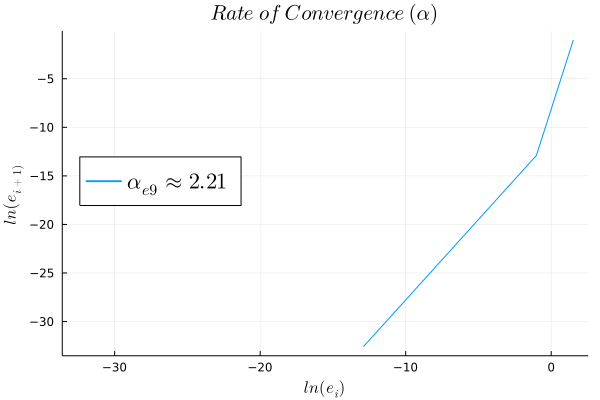

In [5]:
Rate_of_convergence()